## 2019 Bay Wheels Ride Data Exploration and Visualization
## by Nina Haide

## Preliminary Wrangling

> Bay Wheels (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. The dataset used for this exploratory analysis consists of monthly individual trip data from January 2019 to December 2019 in CSV format covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

### Gathering and Assessing Data

In [2]:
# appending all monthly trip data together

folder_name = 'data'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
result = pd.concat(frames, ignore_index=True)
print(result.shape)
result.sample(5)

C:\Users\ninah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\ninah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\ninah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


(2506983, 15)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
1333351,3453,No,981,122.0,37.760299,-122.418892,19th St at Mission St,2019-07-15 18:30:14.0510,NaN,345.0,37.766483,-122.398279,Hubbell St at 16th St,2019-07-15 18:13:52.4020,Customer
1533072,10503,No,1121,443.0,37.320866,-121.876279,3rd St at Keyes St,2019-08-27 17:32:50.0580,NaN,312.0,37.329732,-121.901782,San Jose Diridon Station,2019-08-27 17:14:08.8760,Subscriber
2050633,9723,No,266,92.0,37.772301,-122.393028,Mission Bay Kids Park,2019-10-16 11:44:13.2410,NaN,50.0,37.780526,-122.390288,2nd St at Townsend St,2019-10-16 11:39:46.9460,Customer
135777,5447,No,172,64.0,37.776754,-122.399018,5th St at Brannan St,2019-01-11 14:26:41.8060,NaN,66.0,37.778742,-122.392741,3rd St at Townsend St,2019-01-11 14:23:49.1120,Subscriber
1690480,2050,No,676,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2019-08-05 07:52:38.3260,NaN,129.0,37.758862,-122.412544,Harrison St at 20th St,2019-08-05 07:41:21.8060,Subscriber


In [3]:
# save the appended result to a .csv 

result.to_csv('fordgobike_trips_2019.csv', index=False)

In [4]:
biketrips19 = pd.read_csv('fordgobike_trips_2019.csv')
biketrips19.head()

C:\Users\ninah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer


In [5]:
biketrips19.info

<bound method DataFrame.info of          bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
0           4861                      No         80825           196.0   
1           5506                      No         65900           134.0   
2           2717                      No         62633           157.0   
3           4557                      No         44680            53.0   
4           2100                      No         60709            28.0   
...          ...                     ...           ...             ...   
2506978   719651                     NaN           731             NaN   
2506979   655411                     NaN           748             NaN   
2506980   936881                     NaN          1044             NaN   
2506981   397539                     NaN           326             NaN   
2506982   662304                     NaN          4023             NaN   

         end_station_latitude  end_station_longitude  \
0                   37.

In [7]:
biketrips19.isnull().sum()

bike_id                          0
bike_share_for_all_trip     120838
duration_sec                     0
end_station_id               82902
end_station_latitude             0
end_station_longitude            0
end_station_name             82350
end_time                         0
rental_access_method       2386145
start_station_id             80734
start_station_latitude           0
start_station_longitude          0
start_station_name           80133
start_time                       0
user_type                        0
dtype: int64

In [8]:
biketrips19.duplicated().sum()

0

In [10]:
biketrips19.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [11]:
biketrips19.bike_share_for_all_trip.value_counts()

No     2203584
Yes     182561
Name: bike_share_for_all_trip, dtype: int64

In [13]:
biketrips19.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

### Cleaning 

In [14]:
# copy of the dataframe 
# issue 1: fix multiple fields that are not in the correct dtype

trips19 = biketrips19.copy()
trips19['start_time'] = pd.to_datetime(trips19['start_time'])
trips19['end_time'] = pd.to_datetime(trips19['end_time'])

trips19['start_station_id'] = trips19['start_station_id'].astype('str')
trips19['end_station_id'] = trips19['end_station_id'].astype('str')
trips19['bike_id'] = trips19['bike_id'].astype('str')

trips19['user_type'] = trips19['user_type'].astype('category')
trips19['bike_share_for_all_trip'] = trips19['bike_share_for_all_trip'].astype('category')
trips19['rental_access_method'] = trips19['rental_access_method'].astype('category')

trips19.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    2506983 non-null object
bike_share_for_all_trip    2386145 non-null category
duration_sec               2506983 non-null int64
end_station_id             2506983 non-null object
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null datetime64[ns]
rental_access_method       120838 non-null category
start_station_id           2506983 non-null object
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null datetime64[ns]
user_type                  2506983 non-null category
dtypes: category(3), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 236.7+ MB


In [15]:
# issue 2: add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

trips19['duration_minute'] = trips19['duration_sec']/60

trips19['start_date'] = trips19.start_time.dt.strftime('%Y-%m-%d')
trips19['start_hourofday'] = trips19.start_time.dt.strftime('%H')
trips19['start_dayofweek'] = trips19.start_time.dt.strftime('%A')
trips19['start_month'] = trips19.start_time.dt.strftime('%B')

trips19.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.864,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber,1347.083333,2019-01-31,17,Thursday,January
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.886,Subscriber,1098.333333,2019-01-31,20,Thursday,January
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.530,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.924,Customer,1043.883333,2019-01-31,18,Thursday,January
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.719,Customer,744.666667,2019-01-31,19,Thursday,January
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.541,Customer,1011.816667,2019-01-31,14,Thursday,January


In [17]:
# issue 3: Add columns for the difference in latitude and longitude

trips19['latitude_diff'] = trips19['start_station_latitude'] - trips19['end_station_latitude']

trips19['longitude_diff'] = trips19['start_station_longitude'] - trips19['end_station_longitude']

In [19]:
trips19.head()[['latitude_diff', 'longitude_diff']]

,latitude_diff,longitude_diff
0,-0.033149,0.043423
1,0.033453,0.011713
2,0.023355,0.022954
3,-0.005863,0.008622
4,0.006962,-0.006332


### What is the structure of your dataset?

> The original combined data contains approximately 2,506,982 individual trip records with 16 variables collected. The variables can be divided into 3 major categories:
trip duration: duration_sec, start_time, end_time
station info: start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude
user info (anonymized): bike_id, user_type, bike_share_for_all_trip
Derived features/variables to assist exploration and analysis:
trip info: duration_minute, start_date, start_hourofday, start_dayofweek, start_month
user: user_type

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in exploring the bike trips' duration and rental events occurrance patterns, along with how these related to the user type to get a sense of what people are using the bike sharing service for. Sample questions to answer: When are most trips taken in terms of time of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Each trip's start date/time and duration information will help understanding how long a trip usually takes and when. The user typewill help us find out who is the main target customer group, use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

## Univariate Exploration

>  A series of plots to first explore the trips distribution over hour-of-day, day-of-week and month.

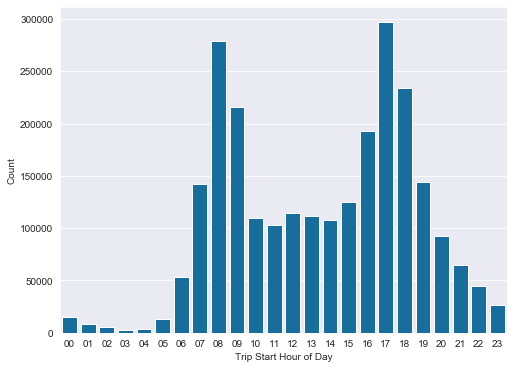

In [25]:
# trip distribution over day hours

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=trips19, x='start_hourofday', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

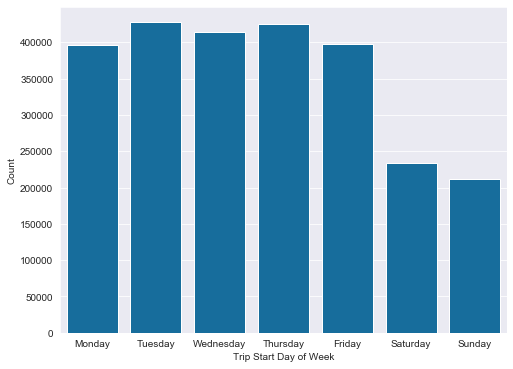

In [27]:
# trip distribution over weekdays
# issue 4: cast 'start_dayofweek' to category dtype

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trips19['start_dayofweek'] = trips19['start_dayofweek'].astype(weekdaycat)

sb.countplot(data=trips19, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

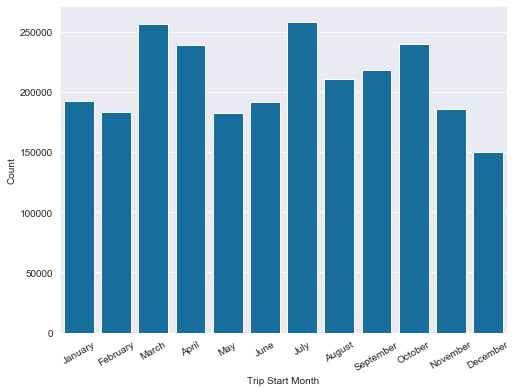

In [29]:
# trip distribution over months
# issue 5: cast 'start_month' to category dtype for easy plotting

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
trips19['start_month'] = trips19['start_month'].astype(monthcat)

sb.countplot(data=trips19, x='start_month', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');

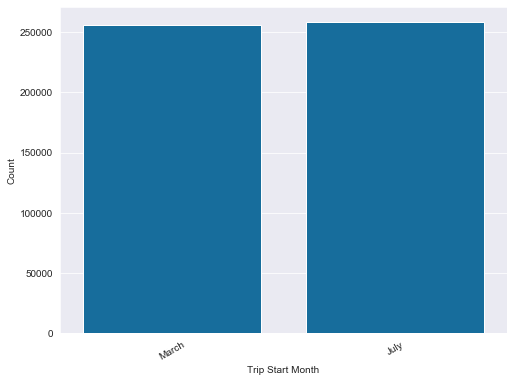

In [30]:
month = ['March', 'July']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
trips19['start_month'] = trips19['start_month'].astype(monthcat)

sb.countplot(data=trips19, x='start_month', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');


The trip distribution over day hours peaks around two timeframes, 8am-9am and 17pm-18pm, during typical rush hours. Looking in combined with the trip distribution over day of week plot, it is quite obvious that the majority of rides happened on work days (Mon-Fri) and primary usage is probably for commuting. In the 12 months in 2019, March and July had the most ride trips compared to the others, specifically July was the busiest month after closer inspection, which could be related to holiday season.

The next several plots are around members/users to see what makes up of the riders.

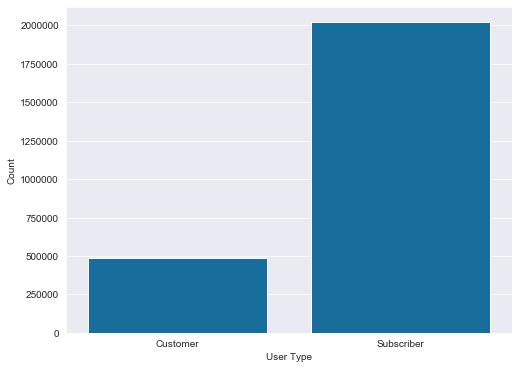

In [32]:
sb.countplot(data=trips19, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');

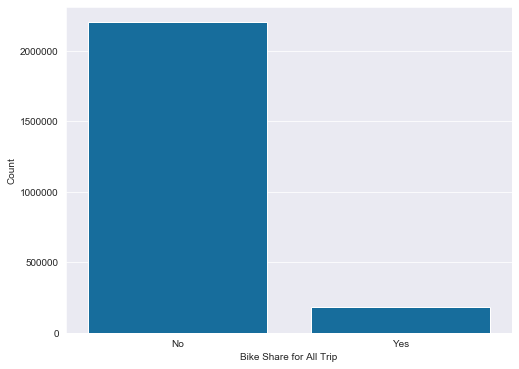

In [33]:
sb.countplot(data=trips19, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

Most riders were subscribers who did not use bike share for the whole trip. As per the trip distribution plots that most trips were on Mon-Fri and maxed during rush hours of a day.

Trip duration distribution to plot next.

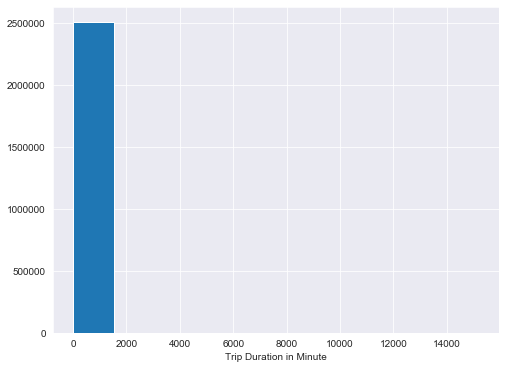

In [34]:
plt.hist(data=trips19, x='duration_minute');
plt.xlabel('Trip Duration in Minute');

It was a little surprising to see the duration distribution spans pretty far to the right (indicates a long time rental, almost 24 hrs) while the majority of the rides were quite short (within 200 mins). Going to zoom in to the most cases for a closer picture of what the distribution is like.

In [35]:
trips19['duration_minute'].describe(percentiles=[.99])

count    2.506983e+06
mean     1.346081e+01
std      3.291190e+01
min      1.000000e+00
50%      9.516667e+00
99%      6.876667e+01
max      1.520183e+04
Name: duration_minute, dtype: float64

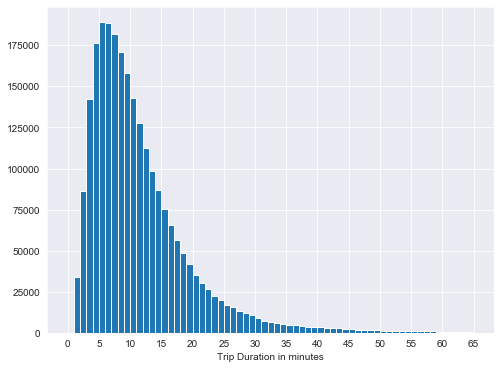

In [36]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=trips19, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in minutes');

It looks like 99% of the trips were less than 1 hour long with most of them fell between 5 to 10 minutes range. I'll remove the outlier long trips for this study to allow focusing on the most common cases to explore the pattern.

In [37]:
# issue 6: filter out outlier trip records where the duration was very long

trips19 = trips19.query('duration_minute <= 66')
trips19.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2480401 entries, 6 to 2506981
Data columns (total 22 columns):
bike_id                    2480401 non-null object
bike_share_for_all_trip    2361079 non-null category
duration_sec               2480401 non-null int64
end_station_id             2480401 non-null object
end_station_latitude       2480401 non-null float64
end_station_longitude      2480401 non-null float64
end_station_name           2399384 non-null object
end_time                   2480401 non-null datetime64[ns]
rental_access_method       119322 non-null category
start_station_id           2480401 non-null object
start_station_latitude     2480401 non-null float64
start_station_longitude    2480401 non-null float64
start_station_name         2401440 non-null object
start_time                 2480401 non-null datetime64[ns]
user_type                  2480401 non-null category
duration_minute            2480401 non-null float64
start_date                 2480401 non-null ob

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The number of trips peaked around 8-9am and 17-18pm during a day, there were more trips on work days (Mon-Fri) compared to weekends. In summer time in July was the most popular month of a year, likely due to holidays and weather.
User-wise, there were most of them subscribers compared to casual riders. The majority of the members did not use bike share for all of the trip.
Most rides were quick and short, lasted between 5 to 10 minutes.
No transformation was needed luckily due to the straightforwardness of the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the trip duration was a little surprising at first plotting out the original data. Used .describe() and xticks() to zoom in to a smaller range where most trip records fell, which made the distribution much clearer. In order to help focusing on the main cases of typical use of the system, I filtered out the outlier long trip records for the study with .query().

In [38]:
# save the clean data to a .csv file

trips19.to_csv('fordgobike_trips_2019_clean.csv', index=False)

## Bivariate Exploration

> How does the trip duration distribution vary between customers and subscribers?

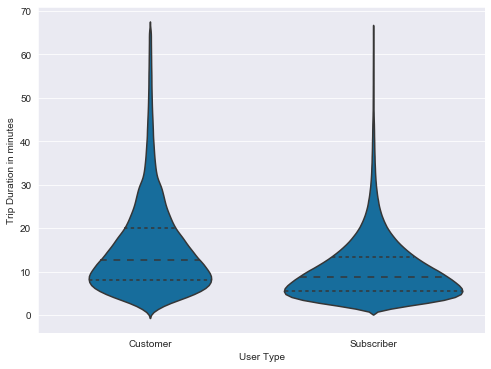

In [40]:
sb.violinplot(data=trips19, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in minutes');

The trip duration distribution is much narrower for subscribers compared to casual riders on the shorter/quicker trip end overall. It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.

**Average Trip Duration on Weekdays**

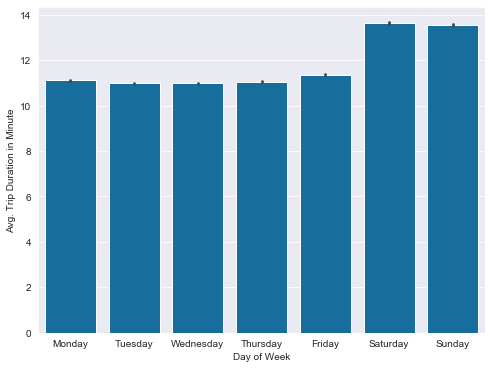

In [42]:
sb.barplot(data=trips19, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends.

**Weekly usage between customers and subscribers**

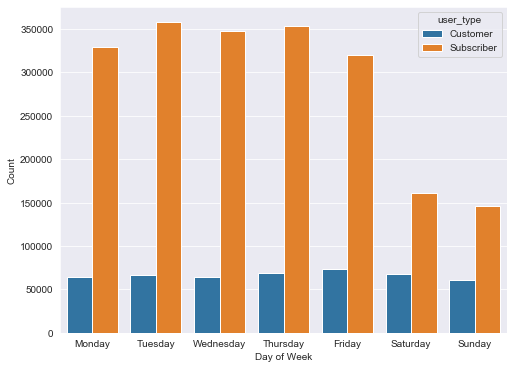

In [45]:
sb.countplot(data=trips19, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

There was much more subscriber usage than casual customers overall. The drop of volume on weekends for subscribers indicates that they primarily ride bikes for work commute during work days, whereas almost the opposite pattern of a slight increase of use for customers on weekends demonstrates that the use was more for leisure/touring and relaxing purposes.

**Daily usage between customers and subscribers**

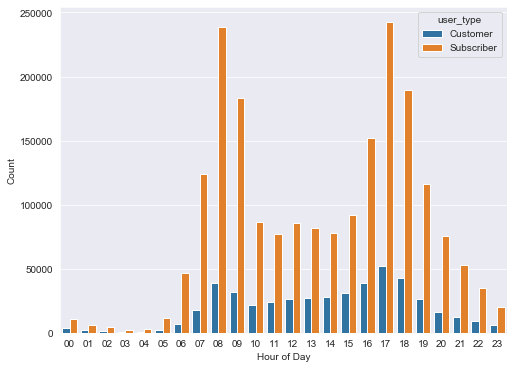

In [46]:
sb.countplot(data=trips19, x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

Subscriber usage clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon, double confirmed their usage purpose and goal of riding. Similar pattern was not observed among customers who tend to ride most in the afternoon or early evening as for a different purpose than the subscriber riders.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are a lot more subscriber usage than customers. The riding habit/pattern varies a lot between subscribers and customers. Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends. Customer users tend to take longer rides overall especially during the summer.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> On weekdays the average trip duration is longer than during the weekend maybe because people tend to have more time.

## Multivariate Exploration

> How does the average trip duration vary in weekdays between customers and subscribers?

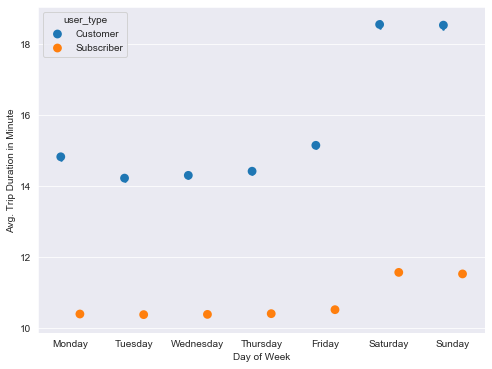

In [49]:
sb.pointplot(data=trips19, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.

**How does the hourly usage vary during weekdays for customers and subscribers?**

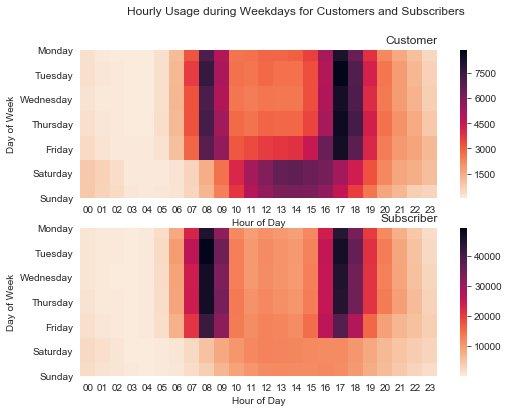

In [50]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = trips19.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = trips19.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The heatmaps shows clearly very different usage pattern/habit between the two type of riders. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 17-18pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17pm Monday to Friday. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.

### Were there any interesting or surprising interactions between features?

> The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed.